In [19]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
%matplotlib inline

## First, I will upload the previous NYC crime data and prepare it again

In [20]:
nyc_crime = pd.read_excel('nyc_crime.xls')

In [21]:
nyc_crime.columns = nyc_crime.iloc[3].rename('')
nyc_crime = nyc_crime.drop(nyc_crime.index[:4])

In [22]:
nyc_crime['Population_Squared'] = nyc_crime['Population']*nyc_crime['Population']

In [23]:
nyc_crime['Murder'] = np.where(nyc_crime['Murder and\nnonnegligent\nmanslaughter'] > 0, 1, 0)

In [24]:
nyc_crime['Robbery2'] = np.where(nyc_crime['Robbery'] > 0, 1, 0)

In [61]:
nyc_crime = nyc_crime.rename(columns = {'Property\ncrime':'Property_Crime', 'Murder and\nnonnegligent\nmanslaughter':'Murder_and_Manslaughter'})

In [62]:
nyc_crime.head()

,City,Population,Violent crime,Murder_and_Manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property_Crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Population_Squared,Murder,Robbery2
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0,3463321,0,0
5,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0,6640929,0,0
6,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0,8099716,0,0
7,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN,9595377936,1,1
8,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN,40806544,0,1


In [94]:
nyc_crime_subset = nyc_crime[['City','Population','Population_Squared', 'Murder', 'Robbery', 'Robbery2','Property_Crime']]

## I decided to lower the population threshold to cities less then 100,000 to remove drastic outliers

In [95]:
lower_pop = nyc_crime_subset[nyc_crime_subset['Population']<100000]

In [157]:
lower_pop.head()

,City,Population,Population_Squared,Murder,Robbery,Robbery2,Property_Crime,Population_scaled
4,Adams Village,1861,3463321,0,0,0,12,1.36286
5,Addison Town and Village,2577,6640929,0,0,0,24,2.0938
6,Akron Village,2846,8099716,0,0,0,16,2.36841
7,Albany,97956,9595377936,1,227,1,4090,99.463
8,Albion Village,6388,40806544,0,4,1,223,5.98432


## Here, I ran the linear regression with the data

In [159]:
regr = linear_model.LinearRegression()
Y = lower_pop['Property_Crime'].values.reshape(-1, 1)
X = lower_pop[['Population', 'Murder','Robbery2']]
Y = Y[:-3]
X = X[:-3]

regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

Coefficients_2013 = regr.coef_
Intercept_2013 = regr.intercept_
r_squared_2013 = regr.score(X,Y)


Coefficients: 
 [[  2.34581853e-02   1.57993157e+02   3.16439894e+01]]

Intercept: 
 [-59.81818557]

R-squared:
0.734103873012


## I will now do the same proceedure with the 2014 data

In [30]:
nyc_crime2014 = pd.read_excel('nyc_crime_2014.xls')

In [31]:
nyc_crime2014.columns = nyc_crime2014.iloc[3].rename('')
nyc_crime2014 = nyc_crime2014.drop(nyc_crime2014.index[:4])

In [33]:
nyc_crime2014['Population_Squared'] = nyc_crime2014['Population']*nyc_crime2014['Population']
nyc_crime2014['Murder'] = np.where(nyc_crime2014['Murder and\nnonnegligent\nmanslaughter'] > 0, 1, 0)
nyc_crime2014['Robbery2'] = np.where(nyc_crime2014['Robbery'] > 0, 1, 0)
nyc_crime2014 = nyc_crime2014.rename(columns = {'Property\ncrime':'Property_Crime'})

In [34]:
nyc_crime2014.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property_Crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Population_Squared,Murder,Robbery2
4,Adams Village,1851,0,0,NaN,0,0,0,11,1,10,0,0,3426201,0,0
5,Addison Town and Village,2568,2,0,NaN,0,1,1,49,1,47,1,0,6594624,0,1
6,Afton Village4,820,0,0,0,NaN,0,0,1,0,1,0,0,672400,0,0
7,Akron Village,2842,1,0,NaN,0,0,1,17,0,17,0,0,8076964,0,0
8,Albany4,98595,802,8,54,NaN,237,503,3888,683,3083,122,12,9720974025,1,1


In [36]:
nyc_crime2014_subset = nyc_crime2014[['City','Population','Population_Squared', 'Murder','Robbery2','Property_Crime']]
lower_pop2014 = nyc_crime2014_subset[nyc_crime2014_subset['Population']<100000]

In [37]:
lower_pop2014.head()

,City,Population,Population_Squared,Murder,Robbery2,Property_Crime
4,Adams Village,1851,3426201,0,0,11
5,Addison Town and Village,2568,6594624,0,1,49
6,Afton Village4,820,672400,0,0,1
7,Akron Village,2842,8076964,0,0,17
8,Albany4,98595,9720974025,1,1,3888


## Now to run the linear regression with population, categorical murder, and categorical robbery... R_squared = 74%

In [160]:
# regr = linear_model.LinearRegression()
Y = lower_pop2014['Property_Crime'].values.reshape(-1, 1)
X = lower_pop2014[['Population', 'Murder','Robbery2']]
Y = Y[:-4]
X = X[:-4]

# regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

Coefficients_2014 = regr.coef_
Intercept_2014 = regr.intercept_
r_squared_2014 = regr.score(X,Y)


Coefficients: 
 [[  2.34581853e-02   1.57993157e+02   3.16439894e+01]]

Intercept: 
 [-59.81818557]

R-squared:
0.729222517161


## Evaluating the different parameters

In [57]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [158]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'Property_Crime ~ Population + Murder + Robbery2'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=lower_pop).fit()

print(lm.summary())

ValueError: shapes (342,233) and (342,233) not aligned: 233 (dim 1) != 342 (dim 0)

In [156]:
lm.params

,0,1,2,3,4,5,6,7,8,9,...,223,224,225,226,227,228,229,230,231,232
Intercept,1.237812e-14,7.910339e-16,3.929149e-16,2.991531e-15,1.000000e+00,-1.856154e-15,-3.122502e-17,2.229987e-15,2.775558e-17,7.156276e-16,...,-6.098637e-19,1.065229e-17,-3.252607e-18,-7.074419e-18,-1.326847e-15,9.730714e-18,-7.589415e-18,9.351244e-18,7.643625e-18,5.629720e-17
Population[T.615],1.000000e+00,-5.993470e-15,5.828671e-16,-2.175343e-15,-1.000000e+00,-2.065188e-15,-1.405126e-16,-8.342285e-15,-2.498002e-16,1.937903e-15,...,-1.474515e-17,-4.889752e-17,3.707971e-17,5.594483e-17,-1.075529e-15,-7.383417e-17,1.387779e-17,-6.223320e-17,-4.423545e-17,3.233525e-15
Population[T.656],7.873042e-15,8.518360e-15,-1.990595e-15,2.609024e-15,-1.000000e+00,-1.400356e-15,2.628106e-16,1.000000e+00,-3.885781e-16,1.153916e-15,...,-3.122502e-17,2.818926e-17,-4.878910e-17,-3.035766e-18,-2.754741e-15,-2.515349e-17,-2.151057e-16,6.938894e-18,-3.469447e-18,-9.228729e-16
Population[T.658],7.546047e-17,1.036627e-14,1.000000e+00,3.341077e-15,-1.000000e+00,-1.845746e-15,6.071532e-18,-3.302046e-15,2.706169e-16,-3.382711e-17,...,-6.071532e-18,2.203099e-16,-1.021318e-16,-9.801188e-17,-1.474081e-15,2.709421e-16,-8.326673e-17,2.736526e-16,2.649790e-16,-7.965850e-15
Population[T.762],-5.078403e-15,9.627715e-17,1.000000e+00,3.261280e-16,-1.000000e+00,-4.701101e-16,-1.919038e-17,-3.313322e-16,-2.428613e-16,6.097553e-16,...,-3.339343e-17,4.857226e-17,-1.656661e-16,9.194034e-17,-2.428613e-16,-4.553649e-17,6.938894e-17,-1.387779e-17,4.510281e-17,-6.661338e-16
Population[T.829],-1.634326e-14,8.703108e-15,-3.949532e-15,-3.171075e-15,-1.000000e+00,-2.630708e-15,-4.267420e-16,4.877609e-15,-2.046974e-16,-2.263814e-15,...,-4.753142e-16,5.030698e-17,-3.230922e-16,-3.209238e-16,1.679212e-15,-3.491131e-17,-4.510281e-16,-2.861277e-17,2.949030e-17,-2.995867e-15
Population[T.872],1.000000e+00,2.837411e-15,-2.168404e-16,7.958586e-16,-1.000000e+00,-1.640181e-15,6.938894e-18,6.140921e-16,-3.920475e-16,-1.811051e-15,...,-1.786765e-16,-3.816392e-17,-2.957704e-16,9.194034e-17,-2.151057e-16,-4.553649e-17,0.000000e+00,-6.938894e-17,9.367507e-17,-3.712308e-16
Population[T.977],-1.505003e-14,-3.085639e-15,-1.158795e-15,2.879641e-15,-1.000000e+00,2.241263e-15,-2.046974e-16,2.810469e-15,-8.604228e-16,3.382711e-17,...,2.307182e-16,-7.372575e-17,-1.786765e-16,1.799776e-17,1.408595e-15,-2.949030e-17,1.387779e-17,7.459311e-17,-6.938894e-18,-5.898060e-16
Population[T.980],-9.185361e-16,-1.225062e-14,2.943826e-15,1.000000e+00,-1.000000e+00,2.040035e-15,5.594483e-17,-5.911938e-15,2.185752e-16,2.088607e-15,...,-5.583641e-18,-4.683753e-17,1.040834e-17,8.023096e-18,-7.199102e-17,-5.973954e-17,1.281391e-16,-3.729655e-17,-4.553649e-17,1.576864e-15
Population[T.997],-9.921751e-15,-2.588207e-15,2.373102e-15,9.853229e-16,-1.000000e+00,1.000000e+00,2.255141e-17,5.336877e-15,4.996004e-16,3.998538e-16,...,2.532696e-16,-6.765422e-17,-4.466913e-17,-2.428613e-17,1.405126e-15,-1.734723e-17,-1.908196e-16,3.035766e-18,-9.063930e-17,1.734723e-16


In [63]:
# lm.pvalues

In [153]:
# lm.rsquared

## Going to try it with raw murder and robbery data

In [64]:
nyc_crime_raw_subset = nyc_crime[['City','Population','Population_Squared', 
                                  'Murder_and_Manslaughter','Robbery',
                                  'Property_Crime']]

In [68]:
lower_pop_raw = nyc_crime_raw_subset[nyc_crime_subset['Population']<100000]

In [70]:
lower_pop_raw.head()

,City,Population,Population_Squared,Murder_and_Manslaughter,Robbery,Property_Crime
4,Adams Village,1861,3463321,0,0,12
5,Addison Town and Village,2577,6640929,0,0,24
6,Akron Village,2846,8099716,0,0,16
7,Albany,97956,9595377936,8,227,4090
8,Albion Village,6388,40806544,0,4,223


## This regression is with population, raw murder, and raw robbery. 
## R-squared = 81%

In [71]:
regr = linear_model.LinearRegression()
Y = lower_pop_raw['Property_Crime'].values.reshape(-1, 1)
X = lower_pop_raw[['Population', 'Murder_and_Manslaughter','Robbery']]
Y = Y[:-3]
X = X[:-3]

regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

Coefficients_2013_raw = regr.coef_
Intercept_2013_raw = regr.intercept_
r_squared_2013_raw = regr.score(X,Y)


Coefficients: 
 [[  0.01794989 -11.83371065   6.75533668]]

Intercept: 
 [-6.04558793]

R-squared:
0.810005571783


## Checking the different parameters to check for correlation with Property Crime

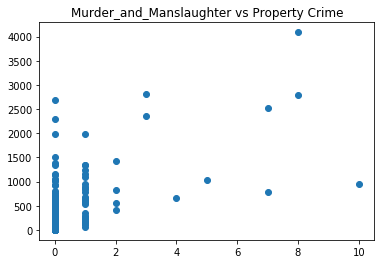

In [78]:
# Between murder and property crime, I'm leaning towards NO....

Z = lower_pop_raw['Murder_and_Manslaughter']
Z = Z[:-3]

plt.scatter(Z, Y)
plt.title('Murder_and_Manslaughter vs Property Crime')
plt.show()

In [79]:
lower_pop_raw.groupby(['Murder_and_Manslaughter']).count()

,City,Population,Population_Squared,Robbery,Property_Crime
Murder_and_Manslaughter,,,,,
0,299,299,299,299,299
1,30,30,30,30,30
2,4,4,4,4,4
3,2,2,2,2,2
4,1,1,1,1,1
5,1,1,1,1,1
7,2,2,2,2,2
8,2,2,2,2,2
10,1,1,1,1,1


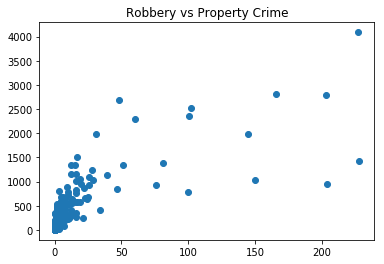

In [80]:
# Between robbery and property crime, I'm leaning towards YES....

Z = lower_pop_raw['Robbery']
Z = Z[:-3]

plt.scatter(Z, Y)
plt.title('Robbery vs Property Crime')
plt.show()

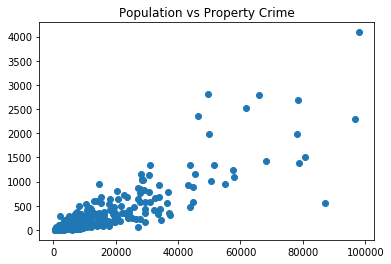

In [81]:
# Between population and property crime... I'm leaning towards YES...

Z = lower_pop_raw['Population']
Z = Z[:-3]

plt.scatter(Z, Y)
plt.title('Population vs Property Crime')
plt.show()

## Since there was no correlation between Murder and Property Crime, I'm going to run the model again without Murder

In [82]:
regr = linear_model.LinearRegression()
Y = lower_pop_raw['Property_Crime'].values.reshape(-1, 1)
X = lower_pop_raw[['Population','Robbery']]
Y = Y[:-3]
X = X[:-3]

regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

Coefficients_2013_raw_no_murder = regr.coef_
Intercept_2013_raw_no_murder = regr.intercept_
r_squared_2013_raw_no_murder = regr.score(X,Y)


Coefficients: 
 [[ 0.01797988  6.39732896]]

Intercept: 
 [-6.38278736]

R-squared:
0.809757009385


## I'm going to check for correlations between parameters

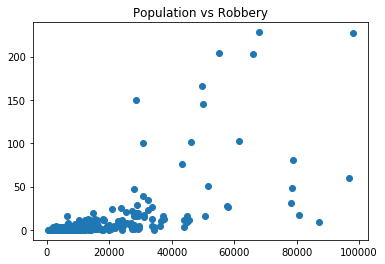

In [83]:
# For population vs robbery I think there is a bit of a correlation

X = lower_pop_raw['Robbery']
X = X[:-3]

Y = lower_pop_raw['Population']
Y = Y[:-3]

plt.scatter(Y, X)
plt.title('Population vs Robbery')
plt.show()

## I'm going to run simple regressions for robbery vs property crime and population vs property crime to see how they go... Both r-squared values are really low... 

In [84]:
regr = linear_model.LinearRegression()
Y = lower_pop_raw['Property_Crime'].values.reshape(-1, 1)
X = lower_pop_raw[['Population']]
Y = Y[:-3]
X = X[:-3]

regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

Coefficients_2013_raw_no_murder = regr.coef_
Intercept_2013_just_population = regr.intercept_
r_squared_2013_just_population = regr.score(X,Y)


Coefficients: 
 [[ 0.02536236]]

Intercept: 
 [-46.55223753]

R-squared:
0.723970228506


In [85]:
regr = linear_model.LinearRegression()
Y = lower_pop_raw['Property_Crime'].values.reshape(-1, 1)
X = lower_pop_raw[['Robbery']]
Y = Y[:-3]
X = X[:-3]

regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

Coefficients_2013_raw_no_murder = regr.coef_
Intercept_2013_just_population = regr.intercept_
r_squared_2013_just_population = regr.score(X,Y)


Coefficients: 
 [[ 12.893188]]

Intercept: 
 [ 175.51642841]

R-squared:
0.597606856291


## So their individual regressions don't account for as much separately as they do together...

## I'm going to try another model that includes murder again as a category and Robbery as continuous... R-square = 81%

In [96]:
regr = linear_model.LinearRegression()
Y = lower_pop['Property_Crime'].values.reshape(-1, 1)
X = lower_pop[['Population', 'Murder','Robbery']]
Y = Y[:-3]
X = X[:-3]

regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

Coefficients_2013 = regr.coef_
Intercept_2013 = regr.intercept_
r_squared_2013 = regr.score(X,Y)


Coefficients: 
 [[  1.78879379e-02   1.82915471e+01   6.32719565e+00]]

Intercept: 
 [-6.81637542]

R-squared:
0.809864039473


In [87]:
lower_pop.head()

,City,Population,Population_Squared,Murder,Robbery2,Property_Crime
4,Adams Village,1861,3463321,0,0,12
5,Addison Town and Village,2577,6640929,0,0,24
6,Akron Village,2846,8099716,0,0,16
7,Albany,97956,9595377936,1,1,4090
8,Albion Village,6388,40806544,0,1,223


## I'm going to try to scale the population just to see what happens...

In [114]:
pop_min = lower_pop['Population'].min()
pop_max = lower_pop['Population'].max()
lower_scale = 1
upper_scale = 100

In [137]:
lower_pop['Population_scaled'] = lower_pop.loc[:, 'Population'] - pop_min
# lower_pop['Popluation_scaled'] = lower_pop.loc[:, "Population_scaled"] / pop_max * 100

In [138]:
lower_pop.head()

,City,Population,Population_Squared,Murder,Robbery,Robbery2,Property_Crime,Population_scaled
4,Adams Village,1861,3463321,0,0,0,12,1335
5,Addison Town and Village,2577,6640929,0,0,0,24,2051
6,Akron Village,2846,8099716,0,0,0,16,2320
7,Albany,97956,9595377936,1,227,1,4090,97430
8,Albion Village,6388,40806544,0,4,1,223,5862


In [139]:
lower_pop['Popluation_scaled'] = lower_pop.loc[:, "Population_scaled"] / pop_max * 100

In [146]:
lower_pop['Population_scaled'] = lower_pop.loc[:, "Population_scaled"] / pop_max

In [148]:
lower_pop['Population_scaled'] = lower_pop.loc[:, "Population_scaled"]*100

In [149]:
lower_pop.head()

,City,Population,Population_Squared,Murder,Robbery,Robbery2,Property_Crime,Population_scaled
4,Adams Village,1861,3463321,0,0,0,12,1.36286
5,Addison Town and Village,2577,6640929,0,0,0,24,2.0938
6,Akron Village,2846,8099716,0,0,0,16,2.36841
7,Albany,97956,9595377936,1,227,1,4090,99.463
8,Albion Village,6388,40806544,0,4,1,223,5.98432


In [150]:
regr = linear_model.LinearRegression()
Y = lower_pop['Property_Crime'].values.reshape(-1, 1)
X = lower_pop[['Population_scaled', 'Murder','Robbery']]
Y = Y[:-3]
X = X[:-3]

regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

Coefficients_2013 = regr.coef_
Intercept_2013 = regr.intercept_
r_squared_2013 = regr.score(X,Y)


Coefficients: 
 [[ 17.52230844  18.29154715   6.32719565]]

Intercept: 
 [ 2.59267992]

R-squared:
0.809864039473


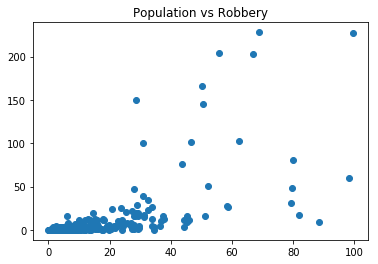

In [151]:
X = lower_pop['Robbery']
X = X[:-3]

Y = lower_pop['Population_scaled']
Y = Y[:-3]

plt.scatter(Y, X)
plt.title('Population vs Robbery')
plt.show()